In [2]:
import numpy as np
import pandas as pd

In [186]:
df = pd.read_csv("stock_prices.csv")

In [265]:
df.head()

,Date,Open,High,Low,Close,Volume,Close_first_diff,forecast
0,2013-01-02,7.000,7.09,6.942,7.072,5974000,NaN,NaN
1,2013-01-03,7.036,7.09,6.950,6.954,3710000,-0.118,NaN
2,2013-01-04,6.960,6.96,6.784,6.880,3370000,-0.074,NaN
3,2013-01-05,6.960,6.96,6.780,6.868,2210000,-0.012,NaN
4,2013-01-06,6.960,6.96,6.780,6.868,2210000,0.000,NaN


In [269]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df = df.resample('D').bfill()

In [270]:
df.head(15)

,Open,High,Low,Close,Volume,Close_first_diff,forecast
Date,,,,,,,
2013-01-02,7.000,7.090,6.942,7.072,5974000,NaN,NaN
2013-01-03,7.036,7.090,6.950,6.954,3710000,-0.118,NaN
2013-01-04,6.960,6.960,6.784,6.880,3370000,-0.074,NaN
2013-01-05,6.960,6.960,6.780,6.868,2210000,-0.012,NaN
2013-01-06,6.960,6.960,6.780,6.868,2210000,0.000,NaN
2013-01-07,6.960,6.960,6.780,6.868,2210000,0.000,NaN
2013-01-08,6.900,6.900,6.622,6.736,6420000,-0.132,NaN
2013-01-09,6.802,6.838,6.680,6.728,3490000,-0.008,NaN
2013-01-10,6.774,6.798,6.676,6.706,4612500,-0.022,NaN


In [271]:
df.describe()

,Open,High,Low,Close,Volume,Close_first_diff,forecast
count,3101.000000,3101.000000,3101.000000,3101.000000,3.101000e+03,3100.000000,198.000000
mean,114.217165,116.820811,111.536718,114.350878,3.933797e+07,0.217319,697.878102
std,177.334219,181.374909,172.759242,177.298435,2.786740e+07,7.099621,87.420882
min,6.616000,6.676000,6.422000,6.582000,2.201000e+06,-88.110016,567.700647
25%,41.810001,42.750000,41.265999,41.798000,2.162820e+07,-0.279998,622.367557
50%,50.835999,51.669998,49.933998,50.750000,3.152700e+07,0.000000,677.867792
75%,68.540001,69.500000,67.141998,68.503998,4.763200e+07,0.477501,741.170328
max,891.380005,900.400024,871.599976,883.090027,3.046940e+08,110.580017,884.479201


<AxesSubplot:xlabel='Date'>

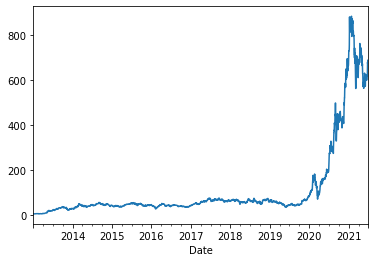

In [272]:
df['Close'].plot()

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3101 entries, 2013-01-02 to 2021-06-29
Freq: D
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              3101 non-null   float64
 1   High              3101 non-null   float64
 2   Low               3101 non-null   float64
 3   Close             3101 non-null   float64
 4   Volume            3101 non-null   int64  
 5   Close_first_diff  3100 non-null   float64
 6   forecast          198 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 193.8 KB


In [274]:
df.Close.isnull().sum()

0

In [275]:
from statsmodels.tsa.stattools import adfuller

In [276]:
def adfuller_test(series):
    result =adfuller(series)
    lables = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used']
    for value, label in zip(result, lables):
        print(label+ ' :'+str(value))
    if result[1]<=0.05:
        print('Null hypothesis: Stationary data')
    else:
        print('Alternate Hypothesis: Non-stationary data')

In [277]:
adfuller_test(df.Close)

ADF Test Statistic :1.1782257405346708
p-value :0.9958319364285854
#Lags Used :28
Number of observations Used :3072
Alternate Hypothesis: Non-stationary data


In [278]:
df['Close_first_diff'] = df['Close']-df['Close'].shift(1)

In [279]:
#df['Close_first_diff'] = df['Close']-df['Close'].shift(6)

In [280]:
df.head()

,Open,High,Low,Close,Volume,Close_first_diff,forecast
Date,,,,,,,
2013-01-02,7.000,7.09,6.942,7.072,5974000,NaN,NaN
2013-01-03,7.036,7.09,6.950,6.954,3710000,-0.118,NaN
2013-01-04,6.960,6.96,6.784,6.880,3370000,-0.074,NaN
2013-01-05,6.960,6.96,6.780,6.868,2210000,-0.012,NaN
2013-01-06,6.960,6.96,6.780,6.868,2210000,0.000,NaN


In [281]:
df.tail()

,Open,High,Low,Close,Volume,Close_first_diff,forecast
Date,,,,,,,
2021-06-25,689.580017,693.809998,668.700012,671.869995,32496700,-7.950012,678.950705
2021-06-26,671.640015,694.700012,670.320007,688.719971,21628200,16.849976,NaN
2021-06-27,671.640015,694.700012,670.320007,688.719971,21628200,0.000000,NaN
2021-06-28,671.640015,694.700012,670.320007,688.719971,21628200,0.000000,NaN
2021-06-29,684.650024,687.510010,675.890015,680.760010,17381300,-7.959961,NaN


<AxesSubplot:xlabel='Date'>

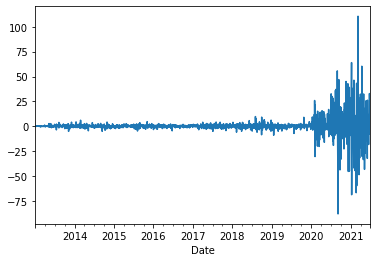

In [282]:
df.Close_first_diff.plot()

In [283]:
adfuller_test(df.Close_first_diff.dropna())

ADF Test Statistic :-10.884877610682677
p-value :1.26743267255068e-19
#Lags Used :27
Number of observations Used :3072
Null hypothesis: Stationary data


In [284]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

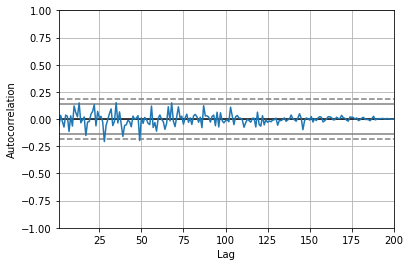

In [285]:
autocorrelation_plot(df.Close_first_diff[-200:])

In [286]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot as plt
import statsmodels.api as sm

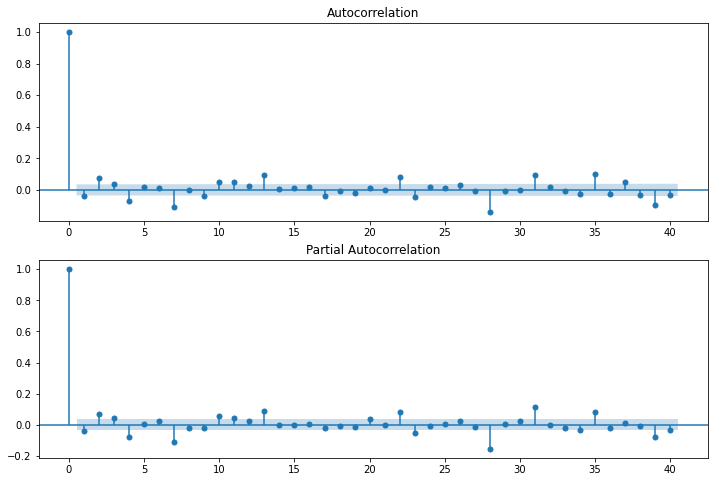

In [287]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig =sm.graphics.tsa.plot_acf(df['Close_first_diff'].dropna(), lags = 40, ax = ax1)

ax2 = fig.add_subplot(212)
fig =sm.graphics.tsa.plot_pacf(df['Close_first_diff'].dropna(), lags = 40, ax = ax2)

In [288]:
from statsmodels.tsa.arima_model import ARIMA

In [289]:
model = ARIMA(df['Close'].dropna(), order = (1,1,1))
model_fit = model.fit()

C:\Users\vivek\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\vivek\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

In [298]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 3100
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10469.931
Method:                       css-mle   S.D. of innovations              7.088
Date:                Sun, 25 Jul 2021   AIC                          20947.862
Time:                        12:05:12   BIC                          20972.019
Sample:                    01-03-2013   HQIC                         20956.537
                         - 06-29-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2174      0.123      1.770      0.077      -0.023       0.458
ar.L1.D.Close    -0.3909      0.151     -2.586      0.010      -0.687      -0.095
ma.L1.D.Close     0.3418      0.154      2.224      0.026       0.041       0.643
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.5583           +0.0000j            2.5583            0.5000
MA.1           -2.9259           +0.0000j            2.9259            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Date'>

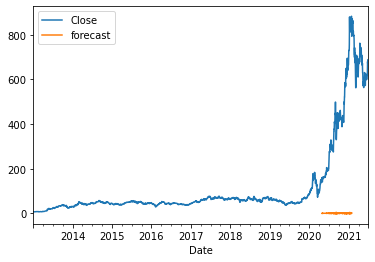

In [299]:
df['forecast'] = model_fit.predict(start = '2020-04-28', end = '2021-01-29' )
df[['Close', 'forecast']].plot()

In [300]:
model=sm.tsa.statespace.SARIMAX(df['Close'],order=(1, 1, 1),seasonal_order=(1,1,1,5))

In [301]:
results=model.fit()

In [302]:
import datetime

<AxesSubplot:xlabel='Date'>

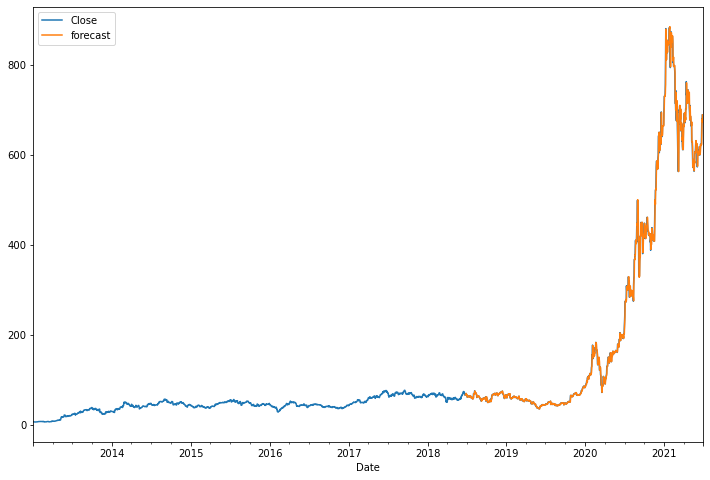

In [307]:
df['forecast']=results.predict(start=2000, end = 3098)

df[['Close','forecast']].plot(figsize=(12,8))

In [308]:
df.tail(10)

,Open,High,Low,Close,Volume,Close_first_diff,forecast
Date,,,,,,,
2021-06-20,624.479980,631.390015,608.880005,620.830017,24812700,0.000000,620.560615
2021-06-21,624.479980,631.390015,608.880005,620.830017,24812700,0.000000,621.425698
2021-06-22,618.250000,628.570007,615.500000,623.710022,19158900,2.880005,621.864604
2021-06-23,632.000000,657.200012,630.039978,656.570007,31099200,32.859985,623.740151
2021-06-24,674.989990,697.619995,667.609985,679.820007,45982400,23.250000,655.412505
2021-06-25,689.580017,693.809998,668.700012,671.869995,32496700,-7.950012,679.094896
2021-06-26,671.640015,694.700012,670.320007,688.719971,21628200,16.849976,673.050417
2021-06-27,671.640015,694.700012,670.320007,688.719971,21628200,0.000000,688.538491
2021-06-28,671.640015,694.700012,670.320007,688.719971,21628200,0.000000,NaN


In [309]:
from pandas.tseries.offsets import DateOffset 

In [327]:
forcasting_dates = [df.index[-1] + DateOffset(days =x) for x in range(0,50)]

In [328]:
future_df2 = pd.DataFrame(index = forcasting_dates[-50:], columns = df.columns)

In [329]:
future_df2

,Open,High,Low,Close,Volume,Close_first_diff,forecast
2021-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [330]:
future_df3 = pd.concat([df, future_df2]) 

In [331]:
future_df3

,Open,High,Low,Close,Volume,Close_first_diff,forecast
2013-01-02,7.000,7.09,6.942,7.072,5974000,NaN,NaN
2013-01-03,7.036,7.09,6.950,6.954,3710000,-0.118,NaN
2013-01-04,6.960,6.96,6.784,6.880,3370000,-0.074,NaN
2013-01-05,6.960,6.96,6.780,6.868,2210000,-0.012,NaN
2013-01-06,6.960,6.96,6.780,6.868,2210000,0.000,NaN
...,...,...,...,...,...,...,...
2021-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [332]:
future_df3['forecast'] = results.predict(start = 2000, end = 3240)

In [333]:
future_df3['forecast']

2013-01-02           NaN
2013-01-03           NaN
2013-01-04           NaN
2013-01-05           NaN
2013-01-06           NaN
                 ...    
2021-08-13    698.210126
2021-08-14    698.006535
2021-08-15    698.679764
2021-08-16    699.460533
2021-08-17    699.617345
Name: forecast, Length: 3151, dtype: float64

<AxesSubplot:>

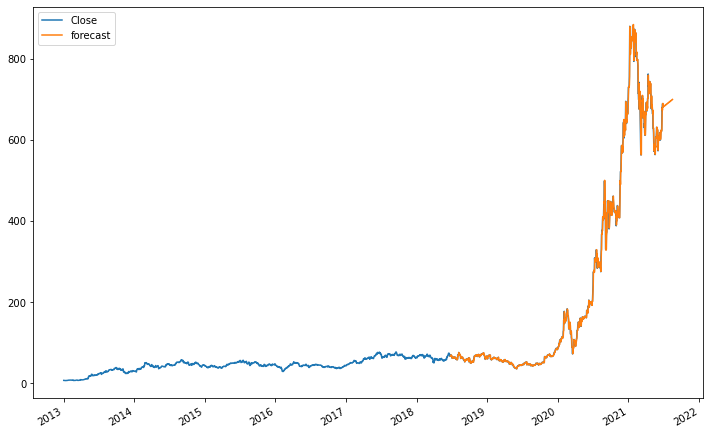

In [334]:
future_df3[['Close', 'forecast']].plot(figsize = (12,8))

In [337]:
future_df3[-30:]

,Open,High,Low,Close,Volume,Close_first_diff,forecast
2021-07-19,NaN,NaN,NaN,NaN,NaN,NaN,688.694913
2021-07-20,NaN,NaN,NaN,NaN,NaN,NaN,688.491322
2021-07-21,NaN,NaN,NaN,NaN,NaN,NaN,689.164551
2021-07-22,NaN,NaN,NaN,NaN,NaN,NaN,689.945320
2021-07-23,NaN,NaN,NaN,NaN,NaN,NaN,690.102132
2021-07-24,NaN,NaN,NaN,NaN,NaN,NaN,690.597956
2021-07-25,NaN,NaN,NaN,NaN,NaN,NaN,690.394365
2021-07-26,NaN,NaN,NaN,NaN,NaN,NaN,691.067593
2021-07-27,NaN,NaN,NaN,NaN,NaN,NaN,691.848363
2021-07-28,NaN,NaN,NaN,NaN,NaN,NaN,692.005174
